#### MobileNetV2 Architecture for tuberculosis classification

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D, AveragePooling2D
from sklearn.preprocessing import Normalizer
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import roc_curve, auc
import os
import sys
import cv2
import shutil

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from imgaug import augmenters as imaug
import skimage.io as skio

from skimage.exposure import histogram
from skimage import data, img_as_float
from skimage import exposure


Using TensorFlow backend.


In [2]:
def augmenter(image,style):
    if (style =="Flip" ):
        aug_img = imaug.Sequential([imaug.Fliplr(0.5)]).augment_image(image)         
    elif(style == "Crop"):
        aug_img = imaug.Sequential([imaug.Crop(percent = (0,0.1))]).augment_image(image)
    elif(style == "Gaussian Blur"):    
        aug_img = imaug.Sequential([imaug.GaussianBlur(sigma = (0,3.0))]).augment_image(image)
    elif(style == "Gaussian Noise"):
        aug_img = imaug.Sequential([imaug.AdditiveGaussianNoise(scale = (0.0,0.2))]).augment_image(image)
    elif(style == "Contrast" ):
        aug_img = imaug.Sequential([imaug.ContrastNormalization(0.5,per_channel = 0.5)]).augment_image(image)
    elif(style == "Multiply" ):
        aug_img = imaug.Sequential([imaug.Multiply((0.8,1.2))]).augment_image(image)
    elif(style == "Affine" ):
        aug_img = imaug.Sequential([imaug.Crop(percent = (0,0.1))]).augment_image(image)
    elif(style == "Scale" ):
        aug_img = imaug.Sequential([imaug.Affine(scale = {"x": (0.8,1.2),"y": (0.8,1.2)})]).augment_image(image)
    elif(style == "Rotate" ):
        aug_img = imaug.Sequential([imaug.Affine(rotate = (30))]).augment_image(image)
    elif(style == "Original"):
        aug_img = image

    return aug_img

In [3]:
def loadData(aug_path,m,n):
    image = []
    label = []
    
    folders = os.listdir(aug_path)
    #print(folders)
    for folder in folders:
        #print(folder)
        folder_path = os.path.join(aug_path,folder)
        if folder_path.endswith('out'):
            print(folder_path)
            data = os.listdir(folder_path)
            #print(data)
            for each in data:
                #print(each)
                data_path = os.path.join(folder_path,each)
                print(data_path)
                img = cv2.resize(cv2.imread(data_path),(m,n))
                im = img
                for style in aug_types:
                    #print(style)
                    newimg = augmenter(im,style)
                    augment_path = 'E:\\CEN\\Sem 3 CEN\\Sowmya mam(Bio medical)\\Augment imgs'
                    datapath = os.path.join(augment_path,each)
                    save_path = datapath +"-"+ style +".png"
                    #print(save_path)
                    cv2.imwrite(save_path,newimg)
                    #print(img)
                    b,g,r = cv2.split(newimg)
                    #print(b.shape)
                    img_eq1 = exposure.equalize_hist(b)
                    #print(g.shape)
                    img_eq2 = exposure.equalize_hist(g)
                    #print(r.shape)
                    img_eq3 = exposure.equalize_hist(r)
                    img_eq = np.zeros((m,n,3))
                    img_eq[:,:,0] = img_eq1
                    img_eq[:,:,1] = img_eq2
                    img_eq[:,:,2] = img_eq3
                    #print(img_eq.shape)
                    plt.imshow(img_eq)
                    image.append(img_eq)
                    path_split = save_path.split("\\")
                    newpath = path_split[-1]
                    label.append(newpath[12])
                    
                    preprocess_data_path = 'E:\\CEN\\Sem 3 CEN\\Sowmya mam(Bio medical)\\preprocessed_data'
                    plt.imsave(os.path.join(preprocess_data_path,newpath),img_eq)
                    
                                                   
    image = np.array(image)
    label = np.array(label)
    return image,label

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0001_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0002_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0003_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0004_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0005_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0006_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0008_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0011_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0013_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0015_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0016_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0017_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0019_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0020_0.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0021_0.png
E:\CEN\Sem

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0369_1.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0372_1.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0375_1.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0383_1.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0387_1.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0390_1.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0393_1.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\out\MCUCXR_0399_1.png


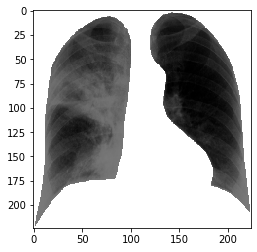

In [4]:
#Augmentation Algorithm

aug_types = {"Flip","Crop","Gaussian Blur","Gaussian Noise","Contrast","Multiply","Affine","Scale","Rotate","Original"}

aug_path = 'E:\\CEN\\Sem 3 CEN\\Sowmya mam(Bio medical)'

m = 224
n = 224

image,label = loadData(aug_path,m,n)


In [32]:
# for preprocessed data accessing 
new_path = 'E:\\CEN\\Sem 3 CEN\\Sowmya mam(Bio medical)\\preprocessed_data'

imgs = []
label = []

m = 224
n = 224

files = os.listdir(new_path)
for file in files:
    #print(file)
    file_path = os.path.join(new_path,file)
    print(file_path)
    img = cv2.imread(file_path)
    imgs.append(img)
    path_split = file_path.split("\\")
    newpath = path_split[-1]
    label.append(newpath[12])
    
imgs = np.array(imgs)
label = np.array(label)

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0001_0.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0001_0.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0001_0.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0001_0.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0001_0.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0001_0.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0001_0.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0001_0.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0001_0.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0001_0.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0002_0.png-Affine.png
E:\CEN\Sem 3 CEN

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0015_0.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0015_0.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0015_0.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0015_0.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0015_0.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0015_0.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0015_0.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0016_0.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0016_0.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0016_0.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0016_0.png-Flip.png
E:\CEN\Sem 3 CEN\S

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0028_0.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0028_0.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0028_0.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0028_0.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0028_0.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0028_0.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0028_0.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0028_0.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0029_0.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0029_0.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0029_0.png-Crop.png
E:\CEN\Sem 3 CEN\S

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0043_0.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0043_0.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0043_0.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0043_0.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0043_0.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0043_0.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0044_0.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0044_0.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0044_0.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0044_0.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0044_0.png-Gaussian Blur.png
E:\CEN\Se

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0054_0.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0055_0.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0055_0.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0055_0.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0055_0.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0055_0.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0055_0.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0055_0.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0055_0.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0055_0.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0055_0.png-Scale.png
E:\CEN\Sem 3 CEN\

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0064_0.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0064_0.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0064_0.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0068_0.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0068_0.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0068_0.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0068_0.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0068_0.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0068_0.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0068_0.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0068_0.png-Original.png
E:\CEN\Sem 3 C

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0081_0.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0081_0.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0081_0.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0081_0.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0081_0.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0081_0.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0082_0.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0082_0.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0082_0.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0082_0.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0082_0.png-Gaussian Blur.png
E:\CEN\Se

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0092_0.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0092_0.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0092_0.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0092_0.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0094_0.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0094_0.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0094_0.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0094_0.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0094_0.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0094_0.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0094_0.png-Multiply.png
E:\CEN\Sem 3 C

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0104_1.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0108_1.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0108_1.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0108_1.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0108_1.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0108_1.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0108_1.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0108_1.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0108_1.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0108_1.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0108_1.png-Scale.png
E:\CEN\Sem 3 CEN\

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0166_1.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0166_1.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0166_1.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0166_1.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0170_1.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0170_1.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0170_1.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0170_1.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0170_1.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0170_1.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0170_1.png-Multiply.png
E:\CEN\Sem 3 C

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0223_1.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0223_1.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0228_1.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0228_1.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0228_1.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0228_1.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0228_1.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0228_1.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0228_1.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0228_1.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0228_1.png-Rotate.png
E:\CEN\Sem 3 CEN

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0282_1.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0282_1.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0282_1.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0289_1.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0289_1.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0289_1.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0289_1.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0289_1.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0289_1.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0289_1.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0289_1.png-Original.png
E:\CEN\Sem 3 C

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0338_1.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0338_1.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0338_1.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0338_1.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0338_1.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0338_1.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0338_1.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0338_1.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0338_1.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0348_1.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0348_1.png-Contrast.png
E:\CEN\Sem 3 C

E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0375_1.png-Gaussian Noise.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0375_1.png-Multiply.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0375_1.png-Original.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0375_1.png-Rotate.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0375_1.png-Scale.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0383_1.png-Affine.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0383_1.png-Contrast.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0383_1.png-Crop.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0383_1.png-Flip.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0383_1.png-Gaussian Blur.png
E:\CEN\Sem 3 CEN\Sowmya mam(Bio medical)\preprocessed_data\MCUCXR_0383_1.png-Gaussian Noise.png
E:\CEN\S

In [33]:
print(label,'\n')
print(imgs.shape)
print(label.shape)


['0' '0' '0' ... '1' '1' '1'] 

(1380, 224, 224, 3)
(1380,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(imgs, label, test_size=0.1, random_state = 30)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1242, 224, 224, 3)
(1242,)
(138, 224, 224, 3)
(138,)


In [35]:
le=LabelEncoder()

y11=le.fit_transform(y_test)
y1_test = to_categorical(y11, 2)

print(y1_test.shape)

(138, 2)


In [6]:
train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.2, random_state = 25)

print(train_x.shape)
print(train_y.shape)
print(valid_x.shape)
print(valid_y.shape)


(993, 224, 224, 3)
(993,)
(249, 224, 224, 3)
(249,)


In [7]:
le1=LabelEncoder()
le2=LabelEncoder()

y1=le1.fit_transform(train_y)
y2=le2.fit_transform(valid_y)
y1_train = to_categorical(y1, 2)
y1_valid = to_categorical(y2, 2)

print(y1_train.shape)
print(y1_valid.shape)

(993, 2)
(249, 2)


In [8]:
# mobilenet_v2
from keras.applications.mobilenet_v2 import MobileNetV2

mobilev2 = MobileNetV2(input_shape=(m,n,3), alpha=1.0, include_top=False, weights='imagenet', input_tensor=None, pooling=None)

mobilev2.summary()

W0922 08:57:06.296478 18332 deprecation_wrapper.py:119] From C:\Users\seshubabu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0922 08:57:06.329522 18332 deprecation_wrapper.py:119] From C:\Users\seshubabu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0922 08:57:06.335606 18332 deprecation_wrapper.py:119] From C:\Users\seshubabu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0922 08:57:06.361208 18332 deprecation_wrapper.py:119] From C:\Users\seshubabu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0922 08:57:06.363302 18332 deprecation_

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [10]:
from keras.layers import GlobalAveragePooling2D

In [11]:
model1 = Sequential()

model1.add(mobilev2)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(2,activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,226,434
Non-trainable params: 34,112
_________________________________________________________________


In [12]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.001, decay=0.001, momentum=0.9, nesterov=False)

model1.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=['accuracy'])

W0922 08:59:36.222645 18332 deprecation_wrapper.py:119] From C:\Users\seshubabu\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [13]:
from keras.callbacks import ModelCheckpoint,CSVLogger

In [14]:
checkpoint = ModelCheckpoint(filepath = 'E:/CEN/Sem 3 CEN/Sowmya mam(Bio medical)/with_30_epochs/Aug_data/checkpoint-{epoch:02d}.hdf5',
                             verbose=1,
                             save_best_only = True,
                             monitor='val_loss')

csvLogger = CSVLogger(filename='E:/CEN/Sem 3 CEN/Sowmya mam(Bio medical)/with_30_epochs/Aug_data/logger.csv',
                      append=True,
                      separator=',')

In [17]:
model1.fit(train_x,y1_train,
          batch_size=128,
          epochs=30,
          verbose=1,
          validation_data=(valid_x,y1_valid),
          callbacks=[checkpoint,csvLogger])

model1.save('E:/CEN/Sem 3 CEN/Sowmya mam(Bio medical)/with_30_epochs/Aug_data/model1.hdf5')

Train on 993 samples, validate on 249 samples
Epoch 1/30
993/993 [==============================] - 1010s 1s/step - loss: 0.7802 - acc: 0.5267 - val_loss: 0.6444 - val_acc: 0.6104

Epoch 00001: val_loss improved from inf to 0.64440, saving model to E:/CEN/Sem 3 CEN/Sowmya mam(Bio medical)/with_30_epochs/Aug_data/checkpoint-01.hdf5
Epoch 2/30
993/993 [==============================] - 692s 697ms/step - loss: 0.5251 - acc: 0.7321 - val_loss: 0.5677 - val_acc: 0.7149

Epoch 00002: val_loss improved from 0.64440 to 0.56771, saving model to E:/CEN/Sem 3 CEN/Sowmya mam(Bio medical)/with_30_epochs/Aug_data/checkpoint-02.hdf5
Epoch 3/30
993/993 [==============================] - 711s 716ms/step - loss: 0.3014 - acc: 0.8973 - val_loss: 0.4804 - val_acc: 0.7390

Epoch 00003: val_loss improved from 0.56771 to 0.48037, saving model to E:/CEN/Sem 3 CEN/Sowmya mam(Bio medical)/with_30_epochs/Aug_data/checkpoint-03.hdf5
Epoch 4/30
993/993 [==============================] - 714s 719ms/step - loss: 0.2

In [18]:
test_loss1 = model1.evaluate(X_test,y1_test)

138/138 [==============================] - 14s 104ms/step


In [19]:
print(test_loss1)

[0.20069947439259378, 0.9130434782608695]


In [20]:
predictions1 = model1.predict(X_test,verbose=1)

138/138 [==============================] - 26s 188ms/step


In [21]:
prediction1 = np.argmax(predictions1,axis=1)
prediction1

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0], dtype=int64)

In [22]:
#prediction1.shape
prediction1[0]  # this is an array of integer

0

In [23]:
#y_test.shape
y_test[0]   # this is an array of string

'1'

confusion matrix for montgomery X-ray dataset

In [24]:
TP=0
TN=0
FN=0
FP=0

for i in range(len(prediction1)):
    if (y_test[i] == '1' and prediction1[i] == 1):
        TP = TP + 1
    elif (y_test[i] == '0' and prediction1[i] == 0):
        TN = TN + 1
    elif (y_test[i] == '1' and prediction1[i] == 0):
        FN = FN + 1
    elif (y_test[i] == '0' and prediction1[i] == 1):
        FP = FP + 1
        

In [25]:
print(TP,TN,FN,FP)

51 75 8 4
